In [7]:
# imports 
import matplotlib.pyplot as plt 
import numpy as np 
import wave, sys 
import os
import pywt
import scipy.io.wavfile as wav
from scipy.signal import resample
from scipy.signal import butter, lfilter
import librosa
import random
import pywt

In [2]:

def load(path: str): 


    sample_rate, data = wav.read(path)

    new_sample_rate = 44100
    resampled_data = resample(data, int(len(data) * (new_sample_rate / sample_rate)))

    time = np.linspace( 
        0, # start 
        len(resampled_data) / new_sample_rate, 
        num = len(resampled_data) 
    ) 

    return [time,resampled_data]
	
def segment(data):
    seg_size = 132300 # note sampled at 44100, and for t=3s, s = 44100*3s

    segmented_data = [data[1][i:i+seg_size] for i in range(0,len(data[1]),seg_size)]

    if len(segmented_data[len(segmented_data)-1]) < seg_size:
        segmented_data.pop()
#     
    return segmented_data


In [4]:
path_normal = "binaryclassification/normal sound"

In [5]:
path_abnormal = "binaryclassification/abnormal sound"

In [8]:
audio_data, sampling_rate = librosa.load('binaryclassification/normal sound/264_1309356143724_D.wav', sr=None, mono=True)

print(f"The sampling rate given: {sampling_rate} Hz")

The sampling rate given: 4000 Hz


In [77]:
data = load("/Users/nafisalsafayet/Downloads/Pascal/media/Abnormal_sound/all_ab/201108222245.wav")
p = segment(data)
len(p)

2

# DOWNSAMPLING

In [10]:
#LOAD THE DATA WUTH THE REQUIRED SAMPLE RATE -1000
def load(path: str): 
    
    sample_rate, data = wav.read(path)

    new_sample_rate = 44100
    resampled_data = resample(data, int(len(data) * (new_sample_rate / sample_rate)))
    
    
    time = np.linspace( 
        0, # start 
        len(resampled_data) / new_sample_rate, 
        num = len(resampled_data) 
    ) 
    
    
    return [time,resampled_data]

# SEGMENTATION

In [11]:
#segmentation of data 
def segment(data):
    seg_size = 132300 # note sampled at  1000, and for t=3s, s = 1000*3s

    segmented_data = [data[1][i:i+seg_size] for i in range(0,len(data[1]),seg_size)]

    if len(segmented_data[len(segmented_data)-1]) < seg_size:
        segmented_data.pop()
#         
    return segmented_data


In [12]:
#for normal wave number of segments
data = load("binaryclassification/normal sound/264_1309356143724_D.wav")
p = segment(data)
print(f"the number of segments this audiofile is divided is {len(p)}")

the number of segments this audiofile is divided is 4


In [13]:
data = load("binaryclassification/abnormal sound/201108222245.wav")
p = segment(data)
print(f"the number of segments this audiofile is divided is {len(p)}")

the number of segments this audiofile is divided is 2


# DATA PROCESSING

In [14]:
folder_normal =  path_normal #"/mnt/chromeos/removable/card/project_cv/Normal_sound"
folder_abnormal = path_abnormal #"/mnt/chromeos/removable/card/project_cv/Abnormal_sound"
files_normal_path = os.listdir(folder_normal)
files_abnormal_path = os.listdir(folder_abnormal)
files_normal = []
files_abnormal = []

for file in files_normal_path:
    if file.endswith(".wav"):
        files_normal.append(os.path.join(folder_normal, file))


for file in files_abnormal_path:
    if file.endswith(".wav"):
        files_abnormal.append(os.path.join(folder_abnormal, file))

        
data_normal = []
data_abnormal = []
for i in files_normal:
    p1 = load(i)
    p2 = segment(p1)
    for j in p2:
        data_normal.append(j)

for i in files_abnormal:
    p1 = load(i)
    p2 = segment(p1)
    for j in p2:
        data_abnormal.append(j)


In [15]:

seg_size = 132300 
time = data[0][:seg_size]

In [16]:
print(f"length of normal data set {len(data_normal)}")
print(f"length of abnormal data set {len(data_abnormal)}")      
len(data_normal),len(data_abnormal)

length of normal data set 492
length of abnormal data set 478


(492, 478)

In [17]:
len(data_normal[0]),len(time)

(132300, 132300)

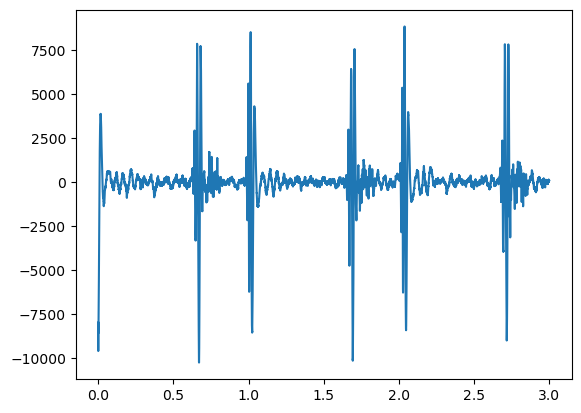

In [18]:
plt.plot(time,p[0])

132300 132300
132300 132300


<Figure size 2700x700 with 0 Axes>

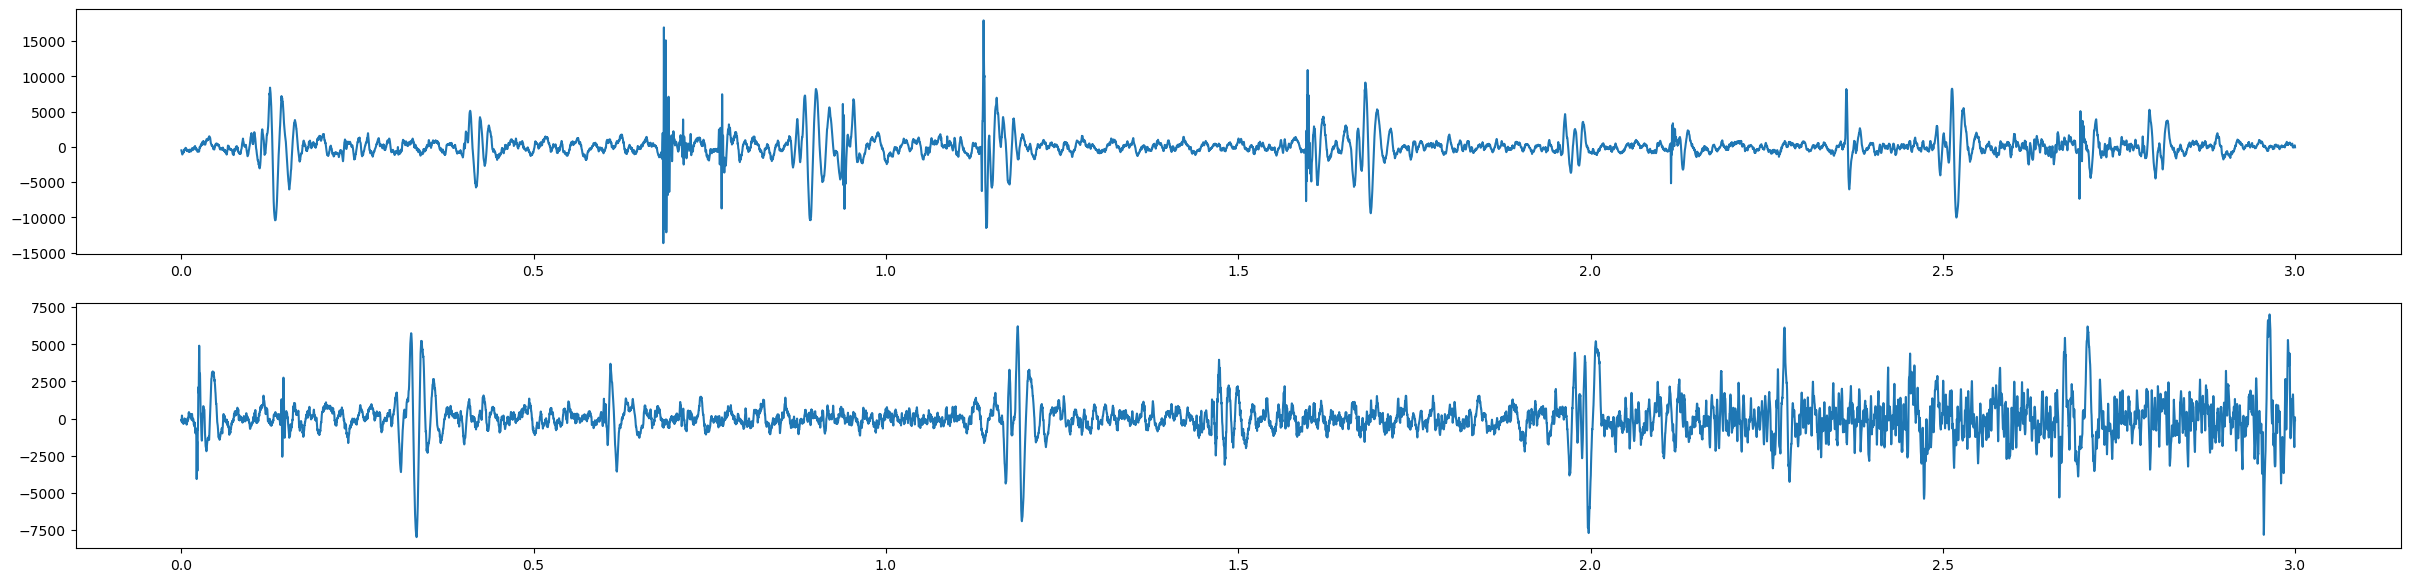

In [19]:
i = 6
# data_normal[i],time
print(len(time),len(data_normal[i])) 
print(len(time),len(data_normal[i+1])) 
plt.figure(figsize=(27,7)) 
# plt.xticks([x/2 for x in range(int(2*np.amax(time)))])
figs,axs = plt.subplots(2,figsize=(30,7))
for j in range(len(axs)):
    axs[j].set_xticks([x/2 for x in range(2+int(2*time[-1]))])
axs[0].plot(time,data_normal[i])
axs[1].plot(time,data_normal[i+1])


132300 132300
132300 132300


<Figure size 2700x700 with 0 Axes>

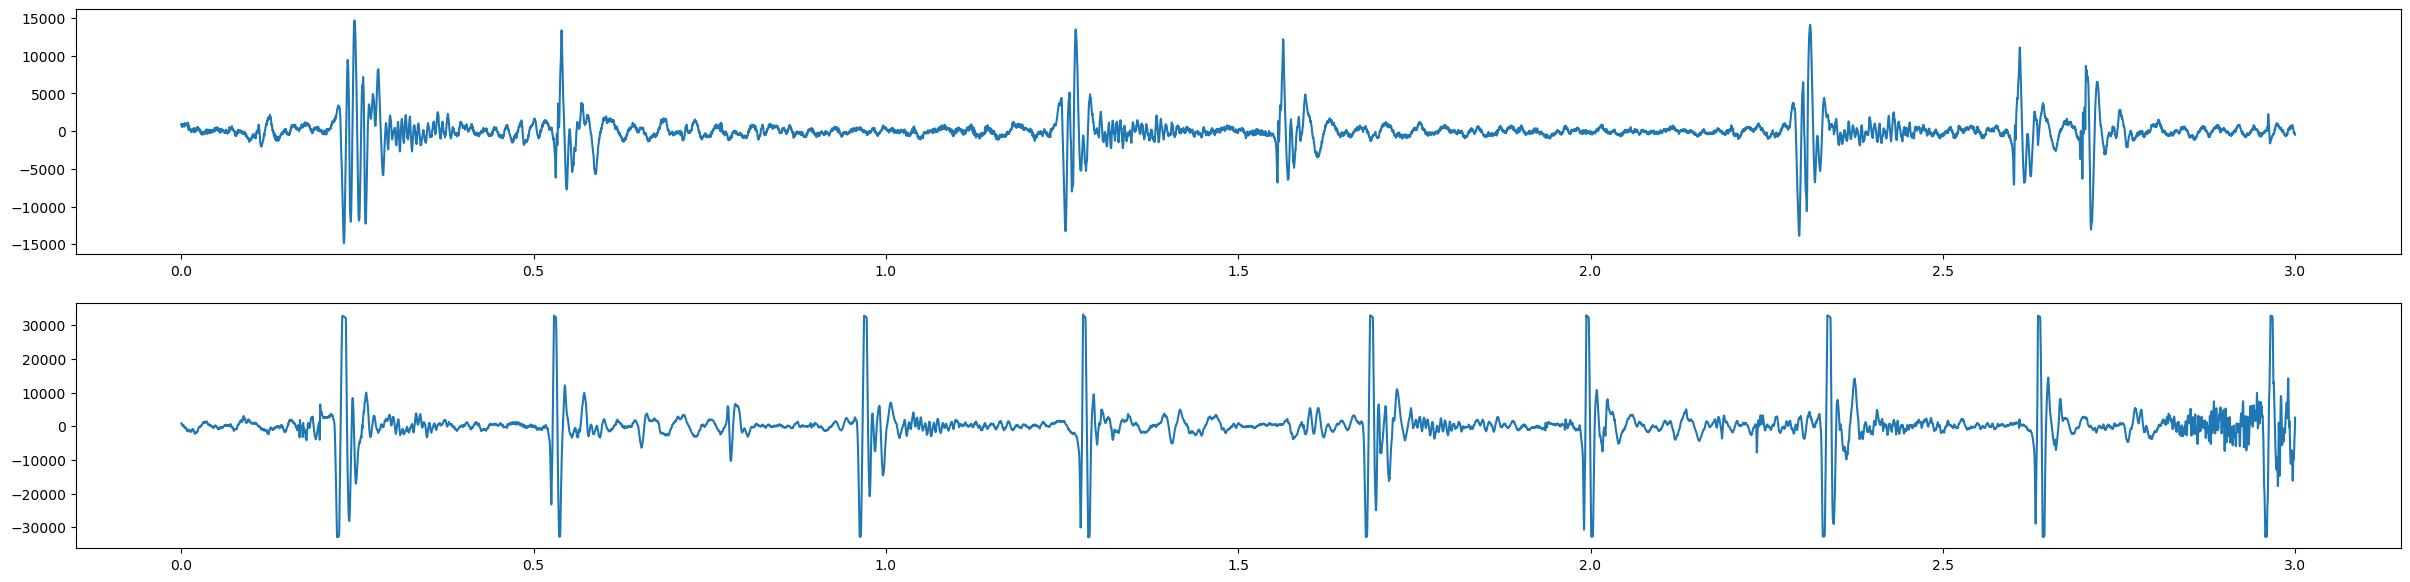

In [20]:
i = 0
# data_normal[i],time
print(len(time),len(data_abnormal[i])) 
print(len(time),len(data_abnormal[i+1])) 
plt.figure(figsize=(27,7)) 
# plt.xticks([x/2 for x in range(int(2*np.amax(time)))])
figs,axs = plt.subplots(2,figsize=(30,7))
for j in range(len(axs)):
    axs[j].set_xticks([x/2 for x in range(2+int(2*time[-1]))])
axs[0].plot(time,data_abnormal[i])
axs[1].plot(time,data_abnormal[i+1])


### note
Plots for normal heart beat using continuous wavelet transform

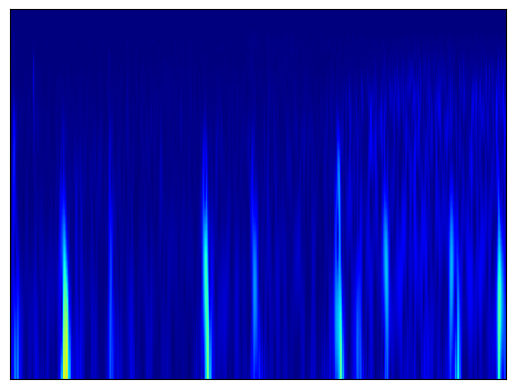

In [21]:

j = 7
width = np.linspace(1,600)
t = time
y = data_normal[j]

coefficients, frequencies = pywt.cwt(y, scales=width, wavelet='morl')

plt.imshow(np.abs(coefficients), cmap='jet', aspect='auto')

plt.tick_params(left = False, right = False , labelleft = False , 
                labelbottom = False, bottom = False)
plt.savefig("sth.png")
plt.show()

In [22]:
len(coefficients[0]),len(coefficients[1]),len(coefficients),len(frequencies)

(132300, 132300, 50, 50)

In [1]:

def normal_img(j):
    width = np.linspace(1,128)
    t = time
    y = data_normal[j]

    coefficients, frequencies = pywt.cwt(y, scales=width, wavelet='morl')

    plt.imshow(np.abs(coefficients),cmap='jet', aspect='auto')

    
    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False,pad_inches=0)
    plt.savefig("test_data/normal/"+str(j)+".png")


In [ ]:
for j in range(len(data_normal)):
    normal_img(j)

In [ ]:

def abnormal_img(j):
    width = np.linspace(1,128)
    t = time
    y = data_abnormal[j]

    coefficients, frequencies = pywt.cwt(y, scales=width, wavelet='morl')

    plt.imshow(np.abs(coefficients),cmap='jet', aspect='auto')

    
    plt.tick_params(left = False, right = False , labelleft = False , 
                    labelbottom = False, bottom = False,pad_inches=0)
    plt.savefig("test_data/abnormal/"+str(j)+".png")

In [ ]:
for j in range(len(data_abnormal)):
    abnormal_img(j)